# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [2]:
df = pd.read_csv('North America Land Data Assimilation System (NLDAS) Daily Air Temperatures and Heat Index (1979-2011).txt',delimiter='\t',skipfooter=14,engine='python')

In [3]:
df

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,40.38
1,NaN,"Jan 02, 1979",1979/01/02,38.92
2,NaN,"Jan 03, 1979",1979/01/03,24.24
3,NaN,"Jan 04, 1979",1979/01/04,14.75
4,NaN,"Jan 05, 1979",1979/01/05,14.62
...,...,...,...,...
12048,NaN,"Dec 27, 2011",2011/12/27,40.38
12049,NaN,"Dec 28, 2011",2011/12/28,36.93
12050,NaN,"Dec 29, 2011",2011/12/29,25.04
12051,NaN,"Dec 30, 2011",2011/12/30,34.93


### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [4]:
df = df[df.Notes != 'Total']

In [5]:
print(df)

       Notes Month Day, Year Month Day, Year Code  \
0        NaN    Jan 01, 1979           1979/01/01   
1        NaN    Jan 02, 1979           1979/01/02   
2        NaN    Jan 03, 1979           1979/01/03   
3        NaN    Jan 04, 1979           1979/01/04   
4        NaN    Jan 05, 1979           1979/01/05   
...      ...             ...                  ...   
12048    NaN    Dec 27, 2011           2011/12/27   
12049    NaN    Dec 28, 2011           2011/12/28   
12050    NaN    Dec 29, 2011           2011/12/29   
12051    NaN    Dec 30, 2011           2011/12/30   
12052    NaN    Dec 31, 2011           2011/12/31   

       Avg Daily Max Air Temperature (F)  
0                                  40.38  
1                                  38.92  
2                                  24.24  
3                                  14.75  
4                                  14.62  
...                                  ...  
12048                              40.38  
12049              

In [6]:
df.drop(['Notes'], axis=1)

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,"Jan 01, 1979",1979/01/01,40.38
1,"Jan 02, 1979",1979/01/02,38.92
2,"Jan 03, 1979",1979/01/03,24.24
3,"Jan 04, 1979",1979/01/04,14.75
4,"Jan 05, 1979",1979/01/05,14.62
...,...,...,...
12048,"Dec 27, 2011",2011/12/27,40.38
12049,"Dec 28, 2011",2011/12/28,36.93
12050,"Dec 29, 2011",2011/12/29,25.04
12051,"Dec 30, 2011",2011/12/30,34.93


>3) Make a column called Date that is in the pandas datetime format

In [7]:
df['Date_Fixed'] = pd.to_datetime(df['Month Day, Year'],errors='raise')
df[['Avg Daily Max Air Temperature (F)','Month Day, Year','Date_Fixed']]

,Avg Daily Max Air Temperature (F),"Month Day, Year",Date_Fixed
0,40.38,"Jan 01, 1979",1979-01-01
1,38.92,"Jan 02, 1979",1979-01-02
2,24.24,"Jan 03, 1979",1979-01-03
3,14.75,"Jan 04, 1979",1979-01-04
4,14.62,"Jan 05, 1979",1979-01-05
...,...,...,...
12048,40.38,"Dec 27, 2011",2011-12-27
12049,36.93,"Dec 28, 2011",2011-12-28
12050,25.04,"Dec 29, 2011",2011-12-29
12051,34.93,"Dec 30, 2011",2011-12-30


>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [8]:
df

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date_Fixed
0,NaN,"Jan 01, 1979",1979/01/01,40.38,1979-01-01
1,NaN,"Jan 02, 1979",1979/01/02,38.92,1979-01-02
2,NaN,"Jan 03, 1979",1979/01/03,24.24,1979-01-03
3,NaN,"Jan 04, 1979",1979/01/04,14.75,1979-01-04
4,NaN,"Jan 05, 1979",1979/01/05,14.62,1979-01-05
...,...,...,...,...,...
12048,NaN,"Dec 27, 2011",2011/12/27,40.38,2011-12-27
12049,NaN,"Dec 28, 2011",2011/12/28,36.93,2011-12-28
12050,NaN,"Dec 29, 2011",2011/12/29,25.04,2011-12-29
12051,NaN,"Dec 30, 2011",2011/12/30,34.93,2011-12-30


In [9]:
df[['Year','Month','Day']] = df['Month Day, Year Code'].apply(lambda x: pd.Series(str(x).split("/")))

In [10]:
df['DateInt'] = df['Date_Fixed'].astype(int)/10e10 # This will be used later

## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

<AxesSubplot:xlabel='Date_Fixed', ylabel='Avg Daily Max Air Temperature (F)'>

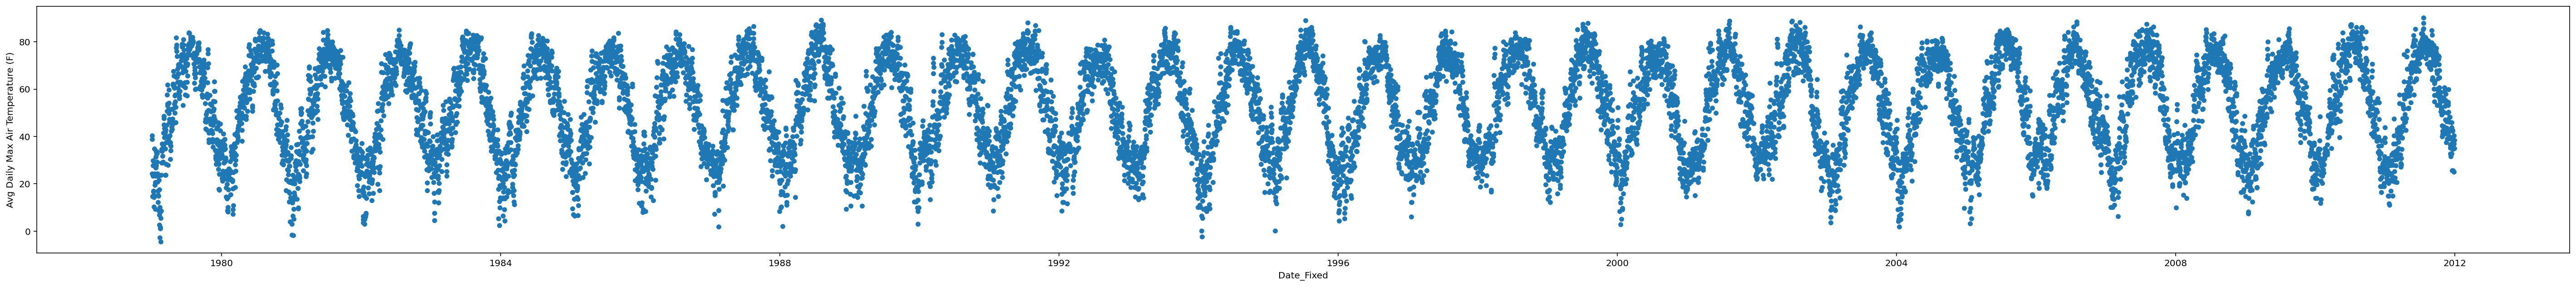

In [11]:
df.plot.scatter (x='Date_Fixed', y='Avg Daily Max Air Temperature (F)', figsize= (50,5))

>5) Describe your plot.

In [12]:
#The average temperature everyday for the last 30 years. You are seeing seasonal temperature changes.

### Adding colors for our graph

In [13]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

<AxesSubplot:xlabel='Date_Fixed', ylabel='Avg Daily Max Air Temperature (F)'>

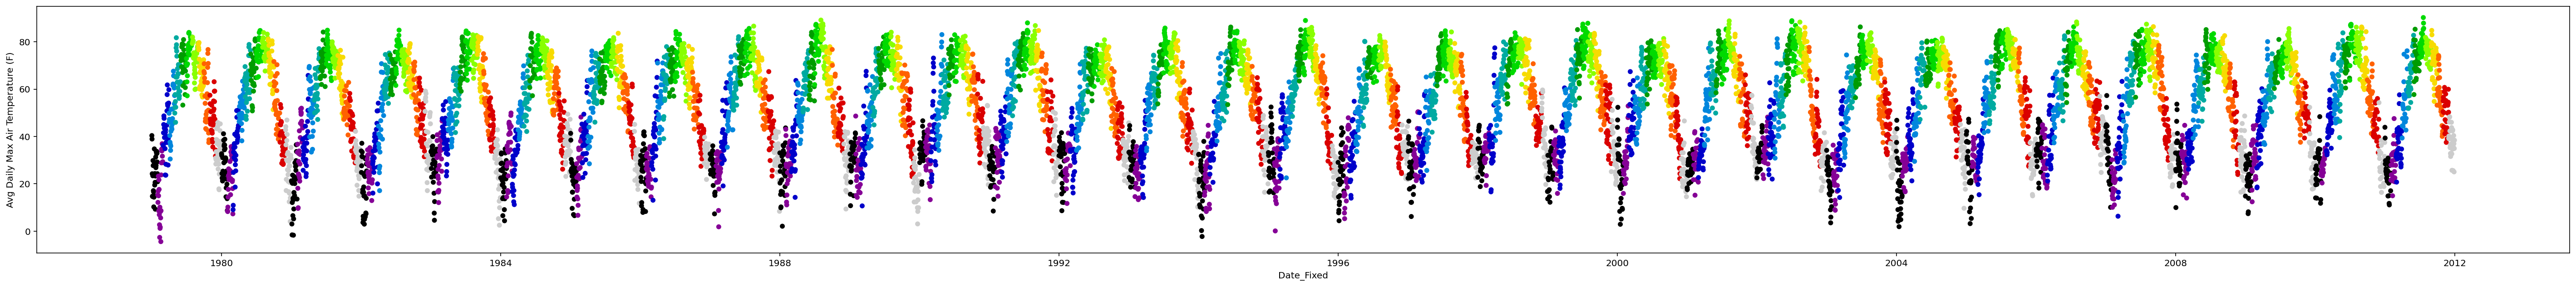

In [14]:
df.plot.scatter(x='Date_Fixed', y ='Avg Daily Max Air Temperature (F)', figsize=(50,5), c=df['color'])

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [19]:
subset = df[(df['Date_Fixed']>pd.datetime(1980,1,1))&(df['Date_Fixed']<pd.datetime(1980,6,1))]

In [21]:
subset

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date_Fixed,Year,Month,Day,DateInt,color
366,NaN,"Jan 02, 1980",1980/01/02,31.99,1980-01-02,1980,01,02,3156192.0,#000000
367,NaN,"Jan 03, 1980",1980/01/03,24.34,1980-01-03,1980,01,03,3157056.0,#000000
368,NaN,"Jan 04, 1980",1980/01/04,22.46,1980-01-04,1980,01,04,3157920.0,#000000
369,NaN,"Jan 05, 1980",1980/01/05,22.29,1980-01-05,1980,01,05,3158784.0,#000000
370,NaN,"Jan 06, 1980",1980/01/06,21.20,1980-01-06,1980,01,06,3159648.0,#000000
...,...,...,...,...,...,...,...,...,...,...
512,NaN,"May 27, 1980",1980/05/27,58.51,1980-05-27,1980,05,27,3282336.0,#00aaa1
513,NaN,"May 28, 1980",1980/05/28,59.77,1980-05-28,1980,05,28,3283200.0,#00aaa1
514,NaN,"May 29, 1980",1980/05/29,65.39,1980-05-29,1980,05,29,3284064.0,#00aaa1
515,NaN,"May 30, 1980",1980/05/30,74.13,1980-05-30,1980,05,30,3284928.0,#00aaa1


>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

<AxesSubplot:xlabel='Date_Fixed', ylabel='Avg Daily Max Air Temperature (F)'>

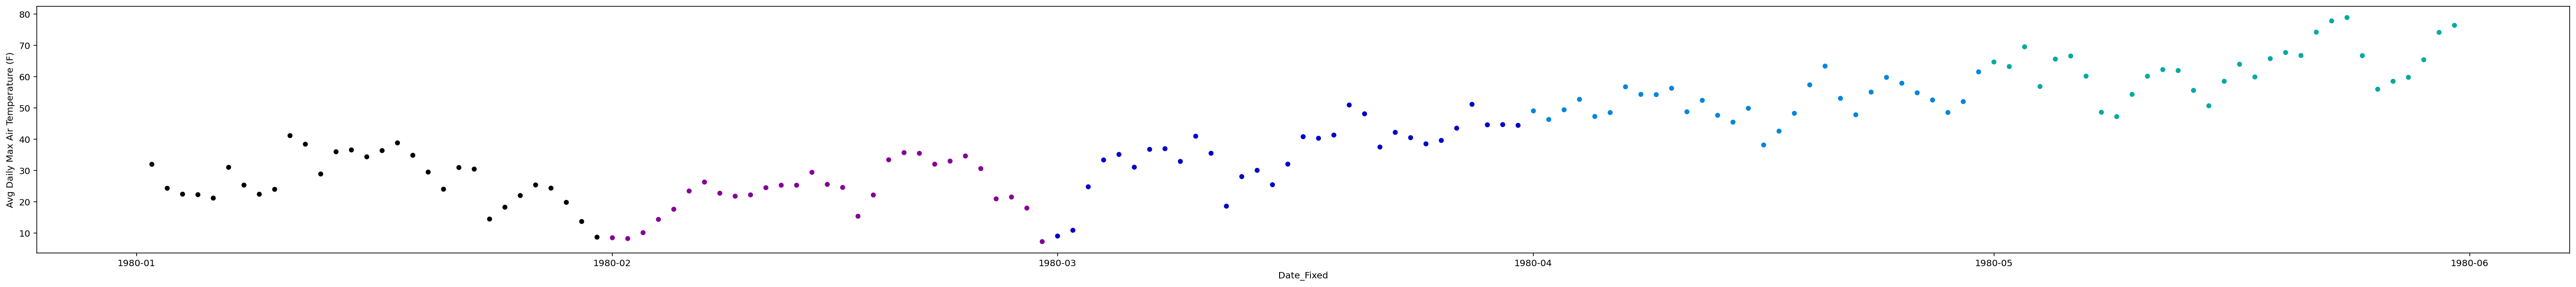

In [28]:
subset.plot.scatter(x='Date_Fixed', y ='Avg Daily Max Air Temperature (F)', figsize=(50,5), c=subset['color'])

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [29]:
X=subset['DateInt'].values
Y=subset['Avg Daily Max Air Temperature (F)'].values

In [30]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [31]:
Y_pred = lin_reg(X,Y)

0.0003856414110607644 -1201.7310124782152


>9) What are the slope and intercept of your best fit line?

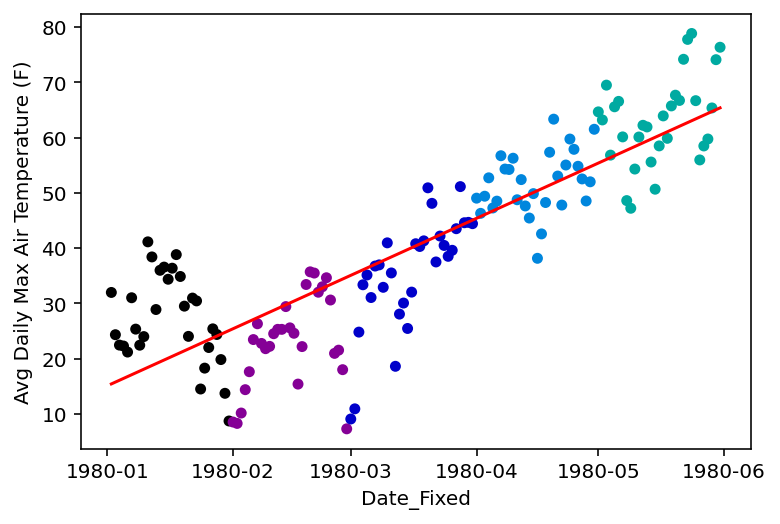

In [33]:
subset.plot.scatter(x='Date_Fixed', y='Avg Daily Max Air Temperature (F)',c=subset['color'])
plt.plot([min(subset['Date_Fixed'].values), max(subset['Date_Fixed'].values)], [min(Y_pred), max(Y_pred)], color='red')
plt.show()

In [ ]:
#slope is 0.0003856414110607644 and intercept is -1201.7310124782152

>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [36]:
Y_pred.min()

15.427323980480878

In [37]:
Y_pred.max()

65.4064508539559

## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [38]:
df

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date_Fixed,Year,Month,Day,DateInt,color
0,NaN,"Jan 01, 1979",1979/01/01,40.38,1979-01-01,1979,01,01,2839968.0,#000000
1,NaN,"Jan 02, 1979",1979/01/02,38.92,1979-01-02,1979,01,02,2840832.0,#000000
2,NaN,"Jan 03, 1979",1979/01/03,24.24,1979-01-03,1979,01,03,2841696.0,#000000
3,NaN,"Jan 04, 1979",1979/01/04,14.75,1979-01-04,1979,01,04,2842560.0,#000000
4,NaN,"Jan 05, 1979",1979/01/05,14.62,1979-01-05,1979,01,05,2843424.0,#000000
...,...,...,...,...,...,...,...,...,...,...
12048,NaN,"Dec 27, 2011",2011/12/27,40.38,2011-12-27,2011,12,27,13249440.0,#cccccc
12049,NaN,"Dec 28, 2011",2011/12/28,36.93,2011-12-28,2011,12,28,13250304.0,#cccccc
12050,NaN,"Dec 29, 2011",2011/12/29,25.04,2011-12-29,2011,12,29,13251168.0,#cccccc
12051,NaN,"Dec 30, 2011",2011/12/30,34.93,2011-12-30,2011,12,30,13252032.0,#cccccc


In [44]:
X=df['DateInt'].values
Y=df['Avg Daily Max Air Temperature (F)'].values

In [45]:
Y_pred = lin_reg(X,Y)

2.9512404066376017e-07 50.21476933875328


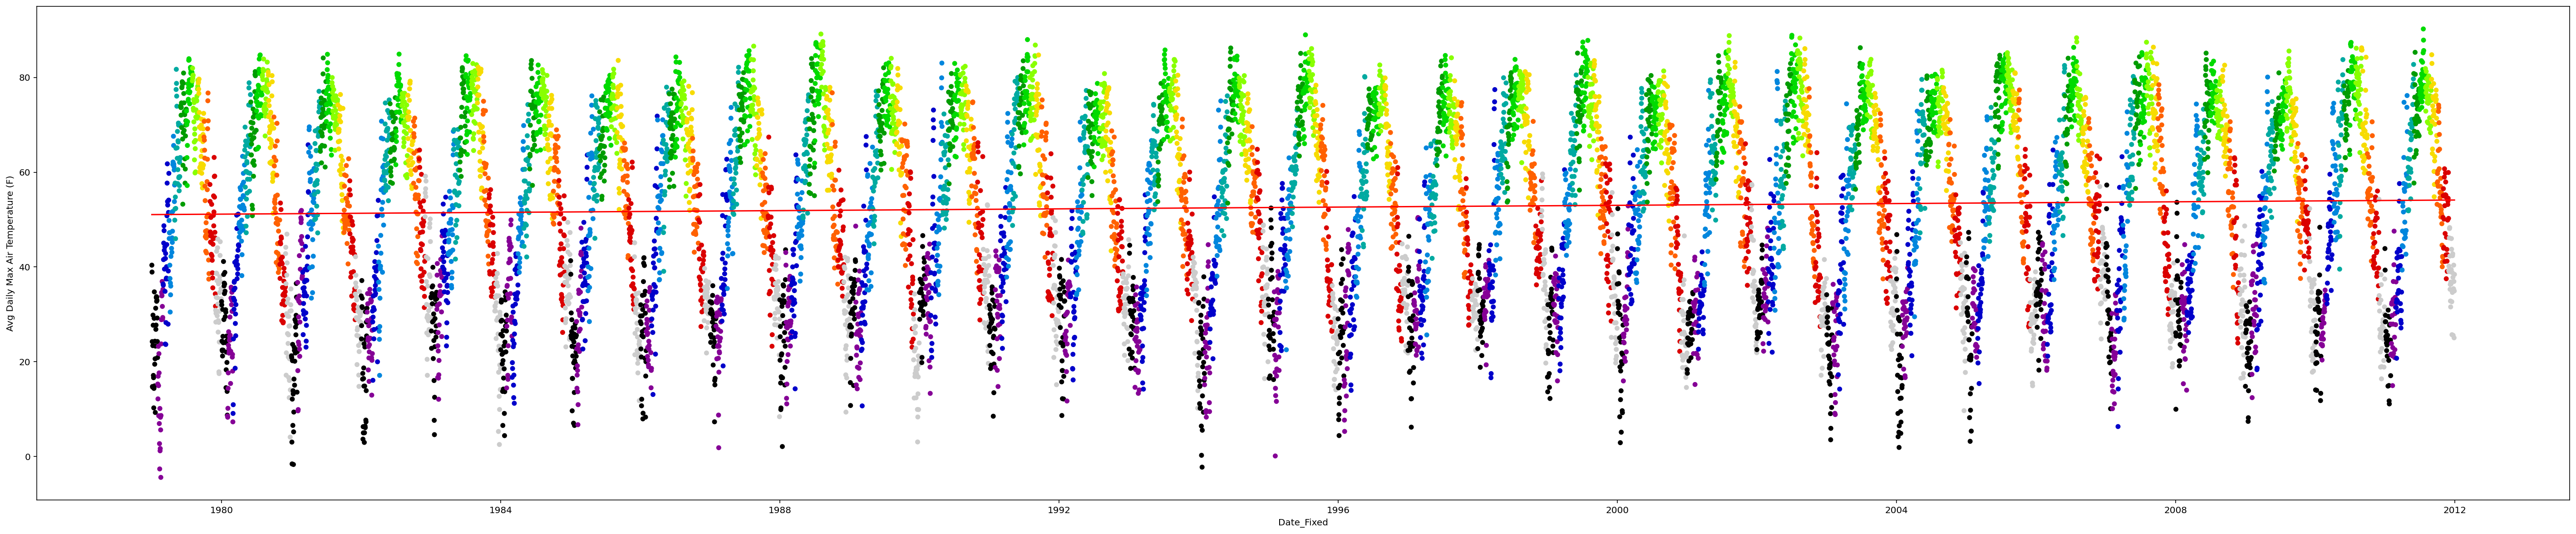

In [48]:
df.plot.scatter(x='Date_Fixed', y='Avg Daily Max Air Temperature (F)',c=df['color'], figsize=[50,10])
plt.plot([min(df['Date_Fixed'].values), max(df['Date_Fixed'].values)], [min(Y_pred), max(Y_pred)], color='red')
plt.show()

>12) Is the slope positive or negative? What do you think that means?

In [ ]:
#The slope is slightly positive over 30 years. This shows us global warmings presence and the earth is slightly getting warmer.